## Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Read in SNP genotype data using read_csv function

In [2]:
SNP_data = pd.read_csv("~/data/rawdata/matrix_1kg.txt",
                       sep = "\t")

SNP_data

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Convert dataframe into numbers only

In [3]:
SNP_data_nums = SNP_data._get_numeric_data()
SNP_data_nums_only = SNP_data_nums.drop('POS', axis = 1)
SNP_data_nums_only

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculate alternate allele count

In [4]:
alt_allele_count = SNP_data_nums_only.sum(axis = 1)
alt_allele_count

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

## Determine total number of chromosomes

In [5]:
SNP_data_nums_only.shape[1]

2548

## Calculate alternate allele frequency

alt allele freq = total # of counts of alt alleles / total number chromosomes (# of samples x 2)

In [6]:
alt_allele_freq = SNP_data_nums_only.sum(axis = 1) / (2 * 2548)
alt_allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

## Plot allele frequency spectrum

### (histogram of allele frequencies across SNPs)

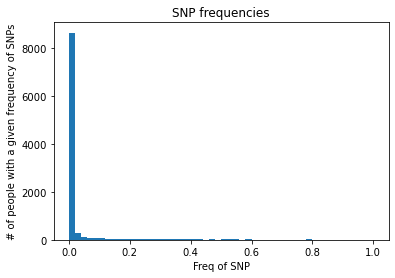

In [7]:
fig, ax = plt.subplots()
ax.hist(alt_allele_freq, bins=50)
plt.title("SNP frequencies")
plt.xlabel("Freq of SNP")
plt.ylabel("# of people with a given frequency of SNPs")
plt.show()

#x = freq of SNP; most SNP only occur in 0.0 - 0.01% of population
#y = number of people with that number of SNP
#(ex. 8000 ppl have unique SNPs (present in <0.1% of the population) 

## Subset data frame to only include common SNPs (alternate allele frequency between 0.05 and 0.95)

In [8]:
common_SNPs = (alt_allele_freq > 0.05) & (alt_allele_freq < 0.95)
common_SNPs

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

## Filter the dataframe containing only SNP numbers so that it outputs only common SNPs

In [9]:
result = SNP_data_nums_only.loc[common_SNPs, :]
result

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


## Transpose this data frame (swap x and y axes)

In [10]:
result = result.T
result

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


## Standardize data frame using so that variance = ~0 

In [11]:
result_standardized = StandardScaler().fit_transform(result)
result_standardized

array([[-0.41383472, -0.26974091, -1.11938741, ..., -0.63868904,
         0.64271638, -0.36559627],
       [ 2.16428478,  1.1386604 ,  0.26048638, ...,  1.12828128,
        -1.04906186, -0.36559627],
       [ 2.16428478, -0.26974091,  1.64036017, ...,  1.12828128,
        -2.74084009, -0.36559627],
       ...,
       [-0.41383472, -0.26974091,  1.64036017, ..., -0.63868904,
         0.64271638, -0.36559627],
       [-0.41383472, -0.26974091, -1.11938741, ..., -0.63868904,
         0.64271638, -0.36559627],
       [-0.41383472, -1.67814222,  0.26048638, ..., -0.63868904,
         0.64271638, -0.36559627]])

## Check that new means ~0 and new variances = 1

In [12]:
result_standardized.mean(axis = 0)

array([-1.56424673e-16, -6.55327876e-16,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  5.70536118e-16,  1.65749152e-16,
        2.45835098e-16,  2.91847481e-16, -6.09446211e-16, -1.71966924e-15,
        1.30866777e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  1.09048476e-15,  5.13979231e-16,
        1.90010226e-15,  3.07794955e-16,  1.41814870e-15,  2.18210240e-16,
        1.21828241e-16, -2.11726677e-15,  1.54158911e-16, -3.32805473e-16,
       -1.36189682e-15, -3.84264398e-16,  1.92110413e-16,  2.84091606e-16,
       -3.47184343e-16,  2.08206032e-15, -4.99861795e-16, -1.89713934e-15,
       -1.42045803e-16, -8.29878639e-16,  2.96379004e-16,  3.13546503e-16,
       -5.90753680e-16, -2.23621923e-15, -6.62038016e-16, -1.99674570e-15,
       -2.44266494e-16, -1.29531829e-15, -5.92017278e-16,  1.59069513e-15,
       -3.25398177e-16, -9.36957646e-16, -7.13496940e-16,  3.40866355e-16,
        1.77016957e-15,  

In [13]:
result_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Specify that we would like to store the top 10 principal components in pca_output

In [14]:
pca = PCA(n_components = 10)
type(pca)

sklearn.decomposition._pca.PCA

## Convert pca input to pca output using pca.fit_transform 

In [15]:
pca_output = pca.fit_transform(result_standardized)
pca_output

array([[-6.14493037, -9.81856666, -1.54675485, ..., -0.24337471,
         0.99662864, -4.76993072],
       [-6.13388414, -8.63182914,  2.5573959 , ...,  4.32360371,
        -3.36092239, -0.64766848],
       [-6.23847319, -7.97187005, -0.74549586, ..., -1.62063788,
         0.79677597,  0.69889412],
       ...,
       [-4.09694721, -2.82736149, -4.1807617 , ...,  0.1371572 ,
         0.23852488,  4.40463535],
       [-6.26346243, -2.58507994, -4.22566054, ..., -1.16156445,
         0.2085018 ,  2.28490231],
       [-3.17677867, -0.91694968, -6.45022438, ...,  3.08570147,
        -2.47482645,  3.28569656]])

## Check that rows = number of input samples and columns = pca #

In [16]:
pca_output.shape

(2548, 10)

## Do PCA, specify column names

In [17]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546755,-5.395385,-0.523472,-0.375688,1.323593,-0.243375,0.996629,-4.769931
1,-6.133884,-8.631829,2.557396,-3.894791,0.321439,-2.065718,2.086985,4.323604,-3.360922,-0.647668
2,-6.238473,-7.971870,-0.745496,-4.014876,-0.939455,4.015204,-1.092112,-1.620638,0.796776,0.698894
3,-5.051218,-7.008727,2.805127,-4.763175,4.380829,0.184173,-2.142173,-1.052288,0.186798,-0.039601
4,-6.634383,-8.543670,3.072176,-1.592857,-4.362323,0.954633,0.686265,-3.603125,1.030554,0.651370
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665810,3.296334,-0.197405,-1.100164,-2.664845,0.174961,-0.830469,0.810046
2544,-6.295888,-3.116491,-5.555759,3.334535,3.338385,3.525382,-1.072863,-3.702705,-2.104295,-0.078791
2545,-4.096947,-2.827361,-4.180762,3.696203,1.550135,0.292487,-0.888111,0.137157,0.238525,4.404635
2546,-6.263462,-2.585080,-4.225661,3.893550,-3.930451,-1.668656,-0.903886,-1.161564,0.208502,2.284902


## Plot samples on P1 and P2

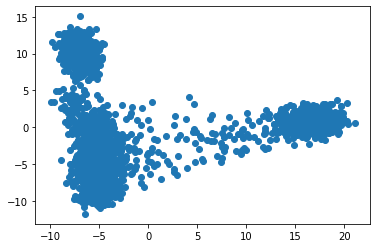

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])